In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=40, centers=2, random_state=20)

In [31]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)


SVC()

In [20]:
clf.predict([[2., 2.]])

array([1])

In [94]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=3)

# fit the model, don't regularize for illustration purposes
#학습 방법 자체는 굉장히 간단함.
clf = svm.SVC(kernel="linear", C=1000)
print(clf.fit(X, y))
#이미 여기서 서포트 벡터는 생김
print(clf.support_vectors_)

SVC(C=1000, kernel='linear')
[[-0.60732739  4.8096319 ]
 [ 0.21219196  1.74387328]
 [-3.07371772  1.33594276]]


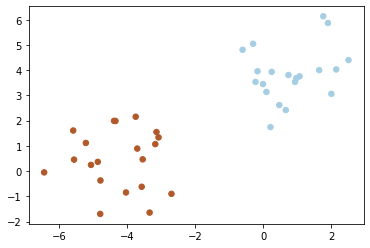

In [70]:
#요런식으로 만들어진 데이터가 어떻게 생겼는지 관찰해 봅시다.
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

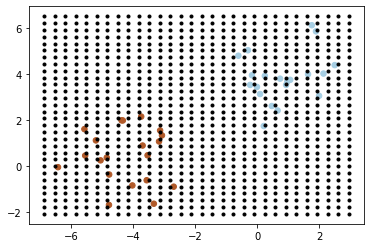

In [86]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
#<plt.gca() 쓰는 법>
# plt.gca().plot([1,2,3])   # 이전 그림이 없으면 생성
# plt.gca().plot([7,8,9])   #  현재 그림에 그림
ax = plt.gca()
# 현재 설정된 x축눈금 알아내기
xlim = ax.get_xlim()
# 현재 설정된 y축눈금 알아내기
ylim = ax.get_ylim()

# create grid to evaluate model
#linspace ( 시작 , 중지 , 숫자 = 50 , 끝점 = True , retstep = False , dtype = 없음 , 축 = 0 )
#최소 ~ 최대 30칸
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
#격자를 만드는 함수
YY, XX = np.meshgrid(yy, xx)
plt.plot(XX, YY, marker='.', color='k', linestyle='none')
plt.show()
#numpy.vstack(tup) 세로로 쌓아버림
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)



[-0.60732739  0.21219196 -3.07371772]
[4.8096319  1.74387328 1.33594276]


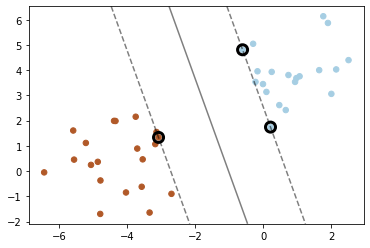

In [96]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
#<plt.gca() 쓰는 법>
# plt.gca().plot([1,2,3])   # 이전 그림이 없으면 생성
# plt.gca().plot([7,8,9])   #  현재 그림에 그림
ax = plt.gca()
# 현재 설정된 x축눈금 알아내기
xlim = ax.get_xlim()
# 현재 설정된 y축눈금 알아내기
ylim = ax.get_ylim()

# create grid to evaluate model
#linspace ( 시작 , 중지 , 숫자 = 50 , 끝점 = True , retstep = False , dtype = 없음 , 축 = 0 )
#최소 ~ 최대 30칸
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
#격자를 만드는 함수
YY, XX = np.meshgrid(yy, xx)
#numpy.vstack(tup) 세로로 쌓아버림
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#뭔데 모르겠음 그냥 ;;
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
#contour([X, Y,] Z, [levels], **kwargs)
#X, Y 배열과 유사, 선택 사항
#Z 값의 좌표입니다 .
#X 및 Y는 양자 모두 동일 형상으로 2D이어야함.
#levesl :  int 또는 배열과 유사, 선택 사항
#등고선/영역의 수와 위치를 결정합니다.

ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
print(clf.support_vectors_[:, 0])
print(clf.support_vectors_[:, 1])
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=3,
    facecolors="none",
    edgecolors="k",
)
plt.show()